# multivariate exploration of the geometry corpus

This is basicaly a raw exploration of the various info we can get from our corpus about wikipedia pages linked by the [`List of geometry topics` page](http://en.wikipedia.org/wiki/List_of_geometry_topics?oldformat=true). The aim of this study is to build an indicator allowing us to order pages by difficulty level.

In [68]:
# -*- coding: utf-8 -*-
%matplotlib inline

# import json
import codecs

import math

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# network = json.load(codecs.open("data/wikipedia-geometry/network.json","r", "utf-8-sig"))
# specialization = json.load(codecs.open("data/wikipedia-geometry/specialization.json","r", "utf-8-sig"))

# print network

# print len(network["nodes"])


## data source preview

In [56]:
# for n in network["nodes"]:
#     titles.append(n["id"])

table = pd.read_csv("data/wikipedia-geometry/final.csv", encoding="UTF-8")

#table.head(25) ## always this stupid utf-8 problem...

table = table.set_index("pagename")
table.head(10)


,average word length,length,number of backlinks,number of backlinks from ns 0,number of categories,number of links,number of revisions,number of revisions by IP,number of revisions by alive registered user,quality of the article,specialization,words
pagename,,,,,,,,,,,,
2D computer graphics,5.912321,24124,0,0,7,403,370,124,246,4,0.1909,3490
3D computer graphics,6.360368,8803,0,0,8,195,893,368,525,4,0.0627,1196
3-sphere,5.071429,17595,0,0,7,116,277,59,218,4,0.3721,2898
Affine geometry,5.424357,15245,0,0,1,97,205,40,165,3,0.3904,2373
Algebraic geometry,5.734462,46919,1375,1009,1,379,626,189,437,4,0.1887,6967
Altitude (triangle),5.541346,12736,0,0,2,59,356,158,198,3,0.0635,1947
Analytic geometry,5.544270,29122,0,0,1,193,477,191,286,4,0.0972,4450
Angle,5.132834,32780,0,0,11,192,1742,704,1038,4,0.0337,5345
Angle trisection,5.515563,14862,0,0,7,163,434,110,324,3,0.2845,2281


## analysis

### raw distribution of specialization

The specialization indicator ($spe(wp,d)$) is a first attempt at quantifying the difficulty of pages.

- $n_{wp}$ is the number of revisions by registered users
- $i_{wp}$ is the number of revisions by unregistered users (IP)
- P(d,v)

\begin{align}
spe(wp, d) = \frac{ P(d, n_wp) - P(d,i_wp) }{ |d| + 1 }
\end{align}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a4dded0>]], dtype=object)

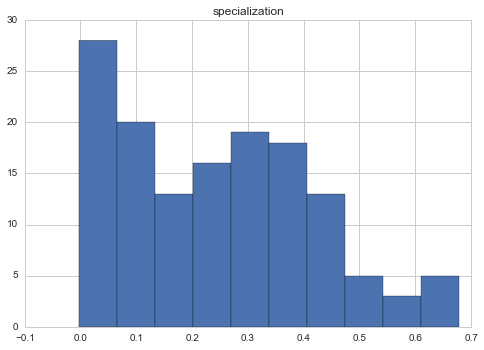

In [57]:
table.hist("specialization")

### links x specialization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ac6a690>]], dtype=object)

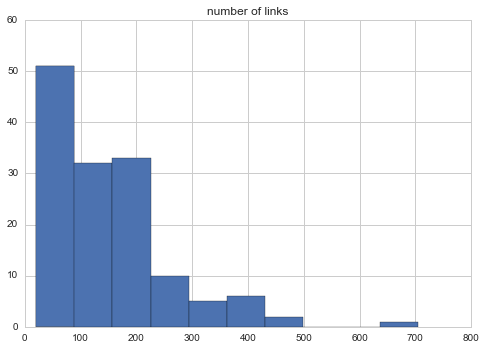

In [58]:
table.hist("number of links")

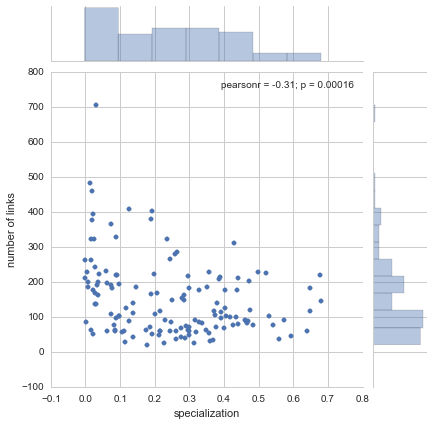

In [59]:
sns.jointplot(table.specialization, table["number of links"])

## quality

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b1560d0>]], dtype=object)

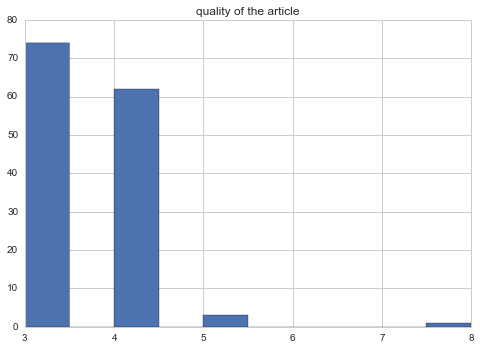

In [60]:
table.hist("quality of the article")

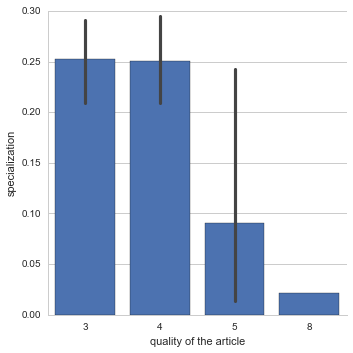

In [61]:
g = sns.factorplot("quality of the article", "specialization", data=table, kind="bar")
#g.despine()

g
#sns.jointplot(table.specialization, table["quality of the article"])

## word lengths

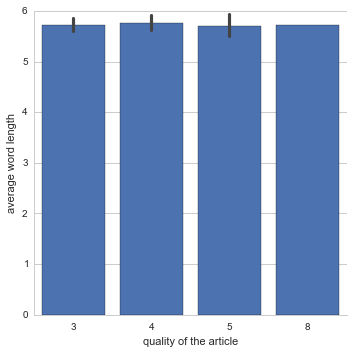

In [62]:
g = sns.factorplot("quality of the article", "average word length", data=table, kind="bar")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b5029d0>]], dtype=object)

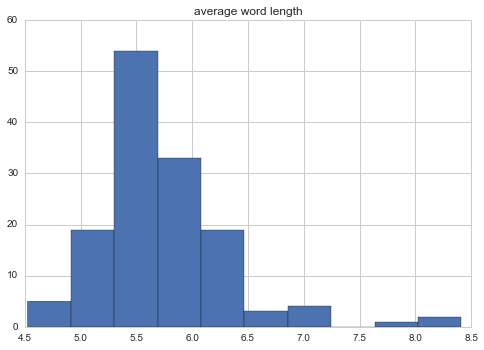

In [63]:
table.hist("average word length")

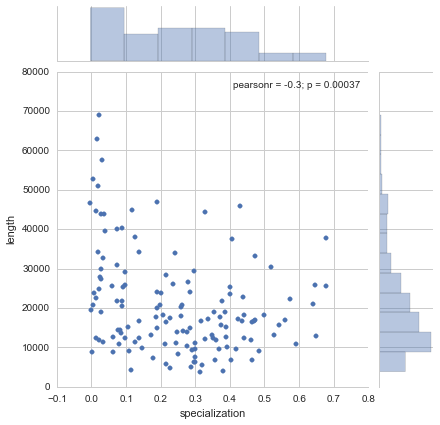

In [64]:
sns.jointplot(table.specialization, table["length"])

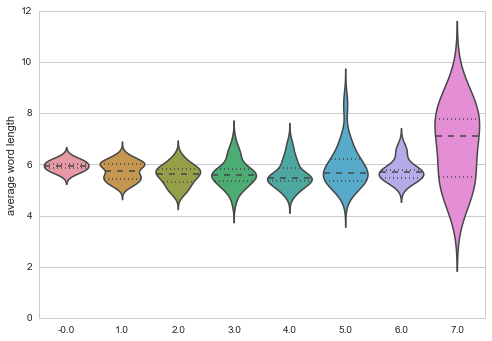

In [65]:
sns.violinplot(table["average word length"], [ math.ceil(x * 10) for x in table["specialization"]])

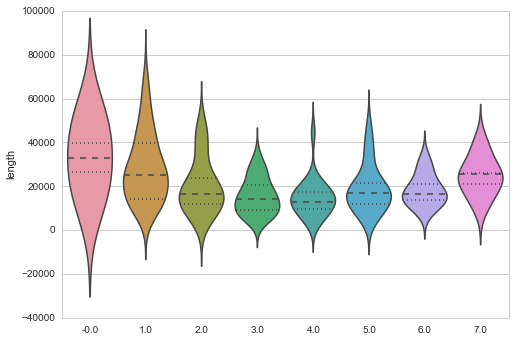

In [66]:
sns.violinplot(table["length"], [ math.ceil(x * 10) for x in table["specialization"]])

## length x revisions

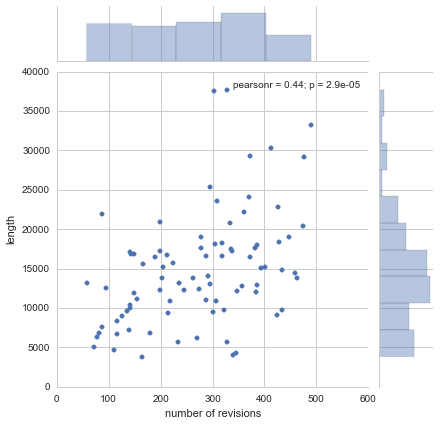

In [67]:
sns.jointplot("number of revisions", "length", data=table[table["number of revisions"] < 500])